<a href="https://colab.research.google.com/github/jgsuarezc/Fotoelasticidad/blob/main/Fotoelastidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2 #RGB imagen
import numpy as np
from google.colab import drive #acceder archivos en el  drive
import matplotlib.pyplot as plt 
import math
from google.colab.patches import cv2_imshow



In [2]:
drive.mount('/content/drive/')
#funcion guarda el RGB del pixel x,y
def Pixel(NArchivo,x,y):
  src = cv2.imread(NArchivo)

  scale_percent = 25 # percent of original size
  width = int(src.shape[1] * scale_percent / 100)
  height = int(src.shape[0] * scale_percent / 100)
  dim = (width, height)

  # redimencionar la image
  img=cv2.resize(src, dim, interpolation = cv2.INTER_AREA)

  #dimensiones de la imagen
  #print('Image Dimensions :', img.shape)
  #coordenadas del punto a estudiar
  R=img[x,y,2]
  V=img[x,y,1]
  A=img[x,y,0]
  RGB=[R,V,A]
  #cv2_imshow(img)
  return RGB 

#lista guarda la ruta de acceso de las 36  imagenes 
Directorio= ['drive/MyDrive/Datos fotoelasticidad/6.jpg','drive/MyDrive/Datos fotoelasticidad/7.jpg','drive/MyDrive/Datos fotoelasticidad/8.jpg','drive/MyDrive/Datos fotoelasticidad/9.jpg','drive/MyDrive/Datos fotoelasticidad/10.jpg','drive/MyDrive/Datos fotoelasticidad/11.jpg','drive/MyDrive/Datos fotoelasticidad/12.jpg','drive/MyDrive/Datos fotoelasticidad/13.jpg','drive/MyDrive/Datos fotoelasticidad/14.jpg','drive/MyDrive/Datos fotoelasticidad/15.jpg','drive/MyDrive/Datos fotoelasticidad/16.jpg','drive/MyDrive/Datos fotoelasticidad/17.jpg','drive/MyDrive/Datos fotoelasticidad/18.jpg','drive/MyDrive/Datos fotoelasticidad/19.jpg','drive/MyDrive/Datos fotoelasticidad/20.jpg','drive/MyDrive/Datos fotoelasticidad/21.jpg','drive/MyDrive/Datos fotoelasticidad/22.jpg','drive/MyDrive/Datos fotoelasticidad/23.jpg','drive/MyDrive/Datos fotoelasticidad/24.jpg','drive/MyDrive/Datos fotoelasticidad/25.jpg','drive/MyDrive/Datos fotoelasticidad/26.jpg','drive/MyDrive/Datos fotoelasticidad/27.jpg','drive/MyDrive/Datos fotoelasticidad/28.jpg','drive/MyDrive/Datos fotoelasticidad/29.jpg','drive/MyDrive/Datos fotoelasticidad/30.jpg','drive/MyDrive/Datos fotoelasticidad/31.jpg','drive/MyDrive/Datos fotoelasticidad/32.jpg','drive/MyDrive/Datos fotoelasticidad/33.jpg','drive/MyDrive/Datos fotoelasticidad/34.jpg','drive/MyDrive/Datos fotoelasticidad/35.jpg','drive/MyDrive/Datos fotoelasticidad/36.jpg','drive/MyDrive/Datos fotoelasticidad/1.jpg','drive/MyDrive/Datos fotoelasticidad/2.jpg','drive/MyDrive/Datos fotoelasticidad/3.jpg','drive/MyDrive/Datos fotoelasticidad/4.jpg','drive/MyDrive/Datos fotoelasticidad/5.jpg','drive/MyDrive/Datos fotoelasticidad/1.jpg','drive/MyDrive/Datos fotoelasticidad/2.jpg','drive/MyDrive/Datos fotoelasticidad/3.jpg','drive/MyDrive/Datos fotoelasticidad/4.jpg','drive/MyDrive/Datos fotoelasticidad/5.jpg','drive/MyDrive/Datos fotoelasticidad/1.jpg','drive/MyDrive/Datos fotoelasticidad/2.jpg','drive/MyDrive/Datos fotoelasticidad/3.jpg','drive/MyDrive/Datos fotoelasticidad/4.jpg','drive/MyDrive/Datos fotoelasticidad/5.jpg']

#guarda el BGR de la n-esima foto en un arreglo  de tamaño[36 x 3]


M=np.zeros((len(Directorio),3))
n=0
for Foto in Directorio:
 
  RGBN=Pixel(Foto,600,230)#n-esima foto
  for i in range(3):
    M[n,i]=RGBN[i]
  n=n+1
RGBT=M/255 # intensidad BGR de las 36 imagenes normalizado
print (RGBT)

Mounted at /content/drive/
[[0.06666667 0.2627451  0.51372549]
 [0.07058824 0.29803922 0.45098039]
 [0.14509804 0.22352941 0.12941176]
 [0.19215686 0.34117647 0.03921569]
 [0.28627451 0.46666667 0.0627451 ]
 [0.50980392 0.65882353 0.15686275]
 [0.46666667 0.69019608 0.18431373]
 [0.52156863 0.76078431 0.34509804]
 [0.51372549 0.82352941 0.47843137]
 [0.44313725 0.81960784 0.57254902]
 [0.36862745 0.8        0.68235294]
 [0.19215686 0.82352941 0.78431373]
 [0.26666667 0.71764706 0.6745098 ]
 [0.34117647 0.76078431 0.79215686]
 [0.19215686 0.59607843 0.69019608]
 [0.0745098  0.4745098  0.58039216]
 [0.01960784 0.32156863 0.58039216]
 [0.0745098  0.32941176 0.59607843]
 [0.07058824 0.25882353 0.53333333]
 [0.04313725 0.18039216 0.2745098 ]
 [0.18823529 0.30196078 0.16078431]
 [0.34509804 0.51372549 0.2       ]
 [0.41960784 0.61176471 0.10980392]
 [0.36862745 0.58039216 0.11372549]
 [0.31372549 0.67058824 0.16862745]
 [0.43921569 0.77254902 0.17647059]
 [0.34117647 0.76078431 0.48235294]
 

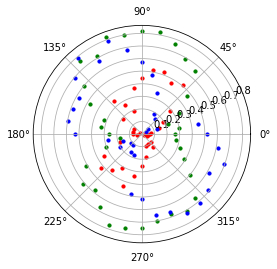

In [3]:
#grafica la intensidad Normalizada vs Angulo  coordenadas polares
fig = plt.figure()
ax = fig.add_subplot(projection="polar")
for i in range(36):
  ax.scatter(2*np.pi/36*i,RGBT[i,0],color = 'red' ,s=10)
  ax.scatter(2*np.pi/36*i,RGBT[i,1], color = 'green',s=10)
  ax.scatter(2*np.pi/36*i,RGBT[i,2],color = 'blue' ,s=10)
plt.show()

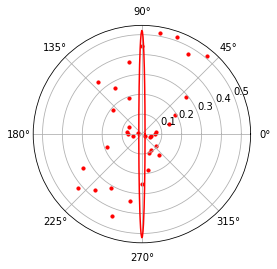

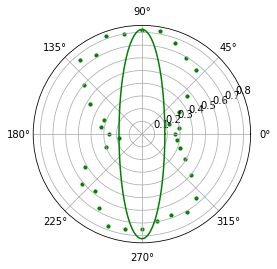

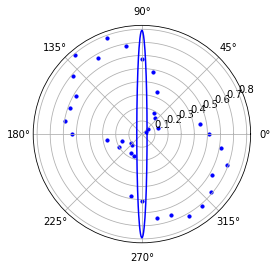

In [47]:
#para cada  una punto le extrae el maximo y el minimo valor de RGB
C= ['red','green','blue']
Maximo=np.amax(RGBT, axis=0)
Minimo=np.amin(RGBT, axis=0)
#excentrididad
exc=np.zeros(3)
for i in range (3):
  a=Maximo[i]
  b=Minimo[i]
  exc[i]=np.sqrt(a*a-b*b)/a

for j in range(3):
  fig = plt.figure()
  ax = fig.add_subplot(projection="polar")
  theta = np.linspace(0,2*np.pi,1000)
  r = (Minimo[j])/np.sqrt(1-(exc[j]*np.cos(theta-np.pi/2))**2)
  ax.plot(theta,r,color=C[j])
  for i in range(36):
    ax.scatter(2*np.pi/36*i,RGBT[i,j],color=C[j],s=10)
  plt.show()
